In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

In [7]:
!pip install wordcloud

In [23]:
import pandas as pd

train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

In [25]:
columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
train_df.columns = columns
val_df.columns = columns

In [41]:
import re

def clean_tweet(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+|@\w+|#\w+|[^a-zA-Z\s]", "", text)
    return text.lower()

# Apply to both training and validation datasets
train_df['Clean_Tweet'] = train_df['Tweet'].apply(clean_tweet)
val_df['Clean_Tweet'] = val_df['Tweet'].apply(clean_tweet)

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Label'] = le.fit_transform(train_df['Sentiment'])
val_df['Label'] = le.transform(val_df['Sentiment'])

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['Clean_Tweet'])
X_val = vectorizer.transform(val_df['Clean_Tweet'])
y_train = train_df['Label']
y_val = val_df['Label']

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

Top-1 Accuracy: 0.95


In [49]:
print(f"Top-1 Accuracy: {accuracy:.2f}")

Top-1 Accuracy: 0.95


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


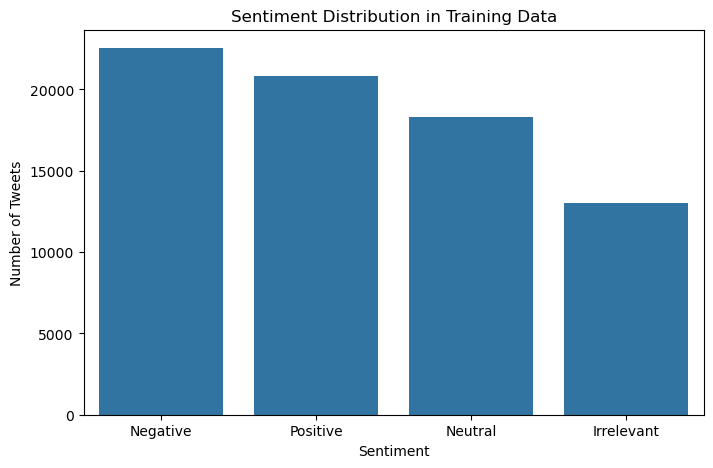

In [55]:
# If you still have original sentiment labels
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=train_df, order=train_df['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

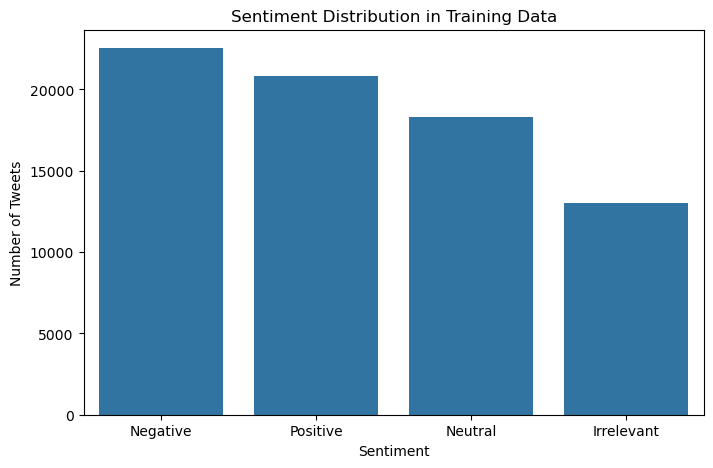

In [57]:
label_map = dict(zip(le.transform(le.classes_), le.classes_))
train_df['Sentiment_Label'] = train_df['Label'].map(label_map)

plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment_Label', data=train_df, order=train_df['Sentiment_Label'].value_counts().index)
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


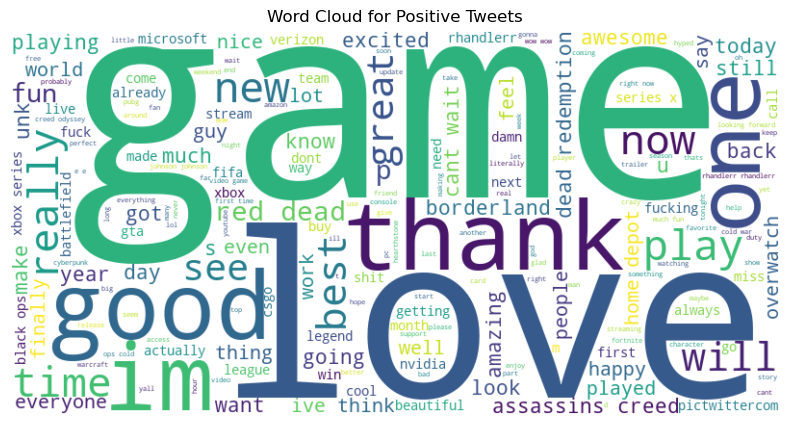

In [59]:
from wordcloud import WordCloud

# Example: Wordcloud for Positive tweets
positive_text = " ".join(train_df[train_df['Sentiment'] == 'Positive']['Clean_Tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()
